In [1]:
import matplotlib.pyplot as plt 
import numpy as np

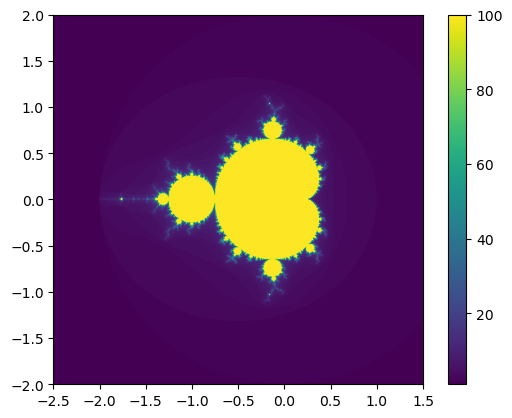

In [2]:
# Mandelbrot set identification under certain number of iteration 
def mandelbrot(c, num_iter):
    z = 0
    for n in range(num_iter):
        # The divergence condition
        if abs(z) > 2:
            return n
        z = z*z + c
    return num_iter

def compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter):
    x = np.linspace(x_min, x_max, Nx)
    y = np.linspace(y_min, y_max, Ny)
    
    C = np.array(np.meshgrid(x, y)).reshape(2, Nx*Ny).T
    return np.array([mandelbrot(complex(c[0], c[1]), num_iter) for c in C]).reshape(Ny, Nx)

# Parameters for visualization
x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2
Nx, Ny = 1000, 1000
num_iter = 100

mandelbrot_image = compute_mandelbrot(Nx, Ny, x_min, x_max, y_min, y_max, num_iter)

# Visualization
plt.imshow(mandelbrot_image, extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
plt.show()

In [3]:
# Sampling

# Random sampling
def pure_random_sampling(num_s, x_min, x_max, y_min, y_max):
    x_s = np.random.uniform(x_min, x_max, num_s)
    y_s = np.random.uniform(y_min, y_max, num_s)
    return np.column_stack((x_s, y_s))

# Testing
num_s=10
print(pure_random_sampling(num_s,x_min, x_max, y_min, y_max))

# Latin hypercube sampling

# Orthogonal sampling

x_min, x_max = -2.5, 1.5
y_min, y_max = -2, 2
Nx, Ny = 1000, 1000
num_iter = 100
num_s=100

# Estimated area
sampling = pure_random_sampling(num_s, x_min, x_max, y_min, y_max)
complex_samples = sampling[:, 0] + 1j * sampling[:, 1]

# Test each sample with the Mandelbrot function
tests = [mandelbrot(c, num_iter) for c in complex_samples]

# Estimate the proportion of points inside the Mandelbrot set
points_inside = len([test for test in tests if test == num_iter])
estimated_proportion = points_inside / num_s

# Estimate the area of the Mandelbrot set within the sampled region
sampled_area = (x_max - x_min) * (y_max - y_min)
estimated_mandelbrot_area = estimated_proportion * sampled_area

print(f"Estimated area of the Mandelbrot set: {estimated_mandelbrot_area}")

[[-1.02117426  1.33311708]
 [-0.88064251 -0.06071541]
 [ 0.88773811  1.51615726]
 [ 0.72290601  0.32562438]
 [-0.50855124  0.63902335]
 [-0.61133416  1.4928329 ]
 [-1.23883299  0.12045536]
 [ 0.94840308  0.15907658]
 [ 0.51588124 -0.94831852]
 [-0.54001537  0.81013085]]
Estimated area of the Mandelbrot set: 1.6
